# Golf Handicap Tracker

### Data Creation

##### This notebook will be used to generate synthetic data and lay the groundwork for how real data will be stored and updated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

%matplotlib inline
pd.set_option("display.max_rows", None)

import warnings

warnings.filterwarnings("ignore")

import inspect

In [2]:
from utils import add_round, generate_data, get_handicaps, fill_handicaps, plot_statistics, histplot, pie_chart, dist_plot, \
rolling_avg, scatter, mean_med_stats, find_round, handicap_differentials, total_profit

<hr style="border: 3px solid blue">

# Data Generation

In [3]:
df = pd.DataFrame(columns=["name", "date", "adj_gross_score", "course_rating", "slope_rating", "handicap_diff",
                           "putts", "3_putts", "fairways_hit", "gir", "penalty/ob", "birdies", "dbl_bogeys_plus", 
                           "profit/loss", "match_format"])

In [4]:
df.head()

Empty DataFrame
Columns: [name, date, adj_gross_score, course_rating, slope_rating, handicap_diff, putts, 3_putts, fairways_hit, gir, penalty/ob, birdies, dbl_bogeys_plus, profit/loss]
Index: []

In [5]:
# Testing Function

df.loc[len(df)] = add_round(name="Dave", date="2024-07-22", adj_gross_score=80, course_rating=72, slope_rating=113, putts=36,
                            three_putts=0, fairways=6, gir=12, penalties=1, birdies=2, dbl_bogeys_plus=1, profit_loss=2.5, 
                            match_format="Skins", calc_diff=False)
df.shape

(1, 14)

In [6]:
# Inspection
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Dave 2024-07-22               80             72           113   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0            NaN     36        0             6   12           1        2   

   dbl_bogeys_plus  profit/loss  
0                1          2.5

In [7]:
# Generate synthetic data
generate_data(df)
df.shape

(301, 14)

In [8]:
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Dave 2024-07-22               80           72.0           113   
1  Pete 2024-07-25               90           73.0           114   
2  Pete 2024-07-28               85           73.5           122   
3  Pete 2024-07-29               84           73.0           127   
4  Pete 2024-07-31               90           71.0           121   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0            NaN     36        0             6   12           1        2   
1            NaN     43        4             3   12           5        0   
2            NaN     40        4             2   14           5        0   
3            NaN     37        4             2   16           2        1   
4            NaN     38        5             6   16           7        0   

   dbl_bogeys_plus  profit/loss  
0                1          2.5  
1                0          0.5  
2                1         -3.0  
3                0         -3.0  
4                2          2.0

In [9]:
# Generate new column
df["handicap_diff"] = handicap_differentials(df)
df[["name", "date", "handicap_diff"]].head(10)

name       date  handicap_diff
0  Dave 2024-07-22       8.000000
1  Pete 2024-07-25      16.850877
2  Pete 2024-07-28      10.651639
3  Pete 2024-07-29       9.787402
4  Pete 2024-07-31      17.743802
5  Pete 2024-08-06       9.759091
6  Pete 2024-08-04      12.819328
7  Pete 2024-08-12       9.725410
8  Pete 2024-08-08      16.617647
9  Pete 2024-08-10      13.213710

In [10]:
# Populate Handicap Column
df = get_handicaps(df)

In [11]:
df.groupby("name")["handicap"].last()

name
Dave    3.847411
Eric    6.584869
Pete    7.762097
Name: handicap, dtype: float64

In [12]:
# Inspection
print(df.shape)
df.head(10)

(301, 15)


name       date  adj_gross_score  course_rating  slope_rating  \
0    Dave 2024-07-22               80           72.0           113   
101  Dave 2024-07-25               80           71.0           112   
201  Eric 2024-07-25               83           73.5           123   
1    Pete 2024-07-25               90           73.0           114   
202  Eric 2024-07-27               91           72.0           128   
102  Dave 2024-07-27               86           71.5           113   
2    Pete 2024-07-28               85           73.5           122   
3    Pete 2024-07-29               84           73.0           127   
103  Dave 2024-07-31               74           72.5           116   
4    Pete 2024-07-31               90           71.0           121   

     handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0         8.000000     36        0             6   12           1        2   
101       9.080357     26        5             2    9           1        0   
201       8.727642     18        2            11    4           0        0   
1        16.850877     43        4             3   12           5        0   
202      16.773438     18        4            11    5           2        1   
102      14.500000     18        4             2   12           0        1   
2        10.651639     40        4             2   14           5        0   
3         9.787402     37        4             2   16           2        1   
103       1.461207     18        5             3    8           3        0   
4        17.743802     38        5             6   16           7        0   

     dbl_bogeys_plus  profit/loss  handicap  
0                  1          2.5       NaN  
101                0         -1.0       NaN  
201                1          1.5       NaN  
1                  0          0.5       NaN  
202                0          3.5       NaN  
102                1         -1.5  5.680000  
2                  1         -3.0       NaN  
3                  0         -3.0  7.395906  
103                0          3.0  0.402759  
4                  2          2.0  8.395906

<hr style="border:3px solid blue">

# Demonstration of Plotting Functions 

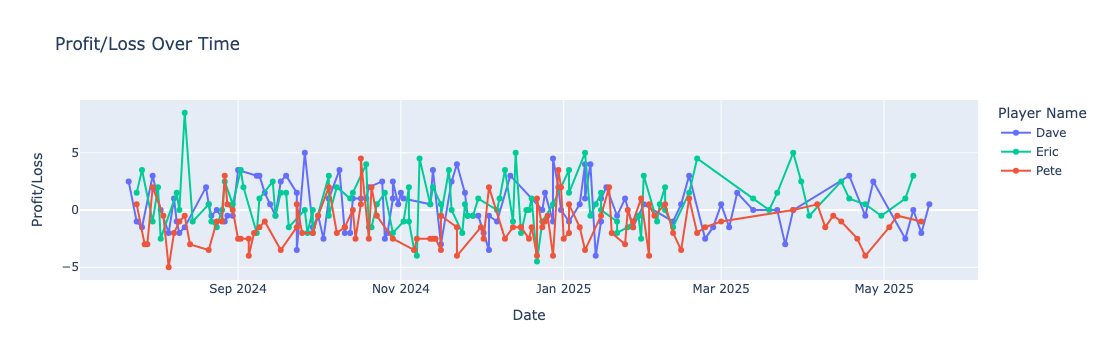

In [13]:
# Plotting handicap over time
plot_statistics(df, 'profit/loss')

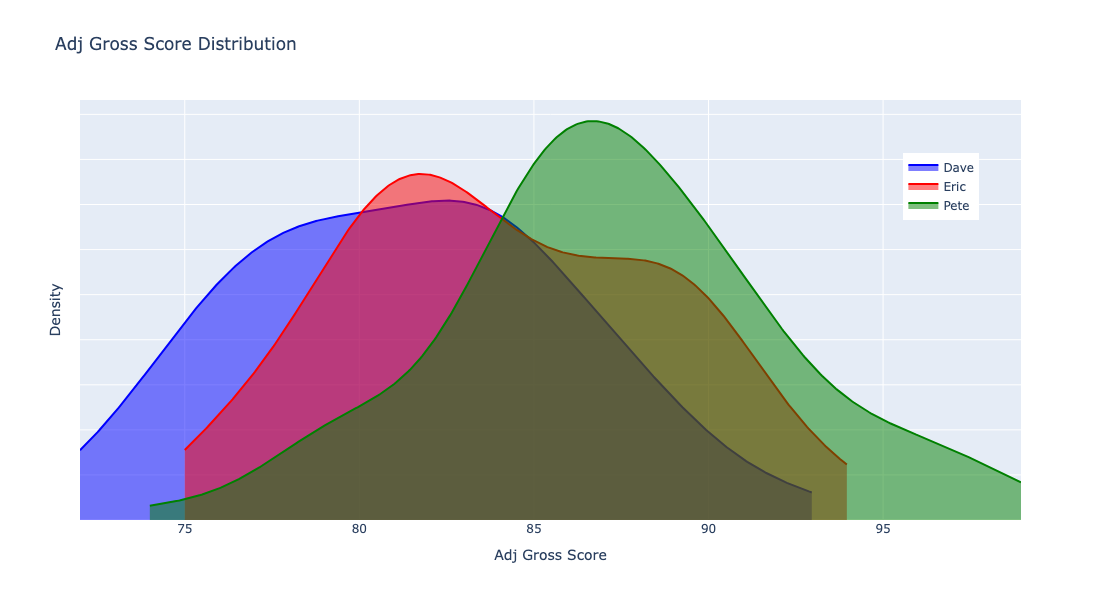

In [14]:
# Plot distributions using KDE
dist_plot(df, "adj_gross_score")

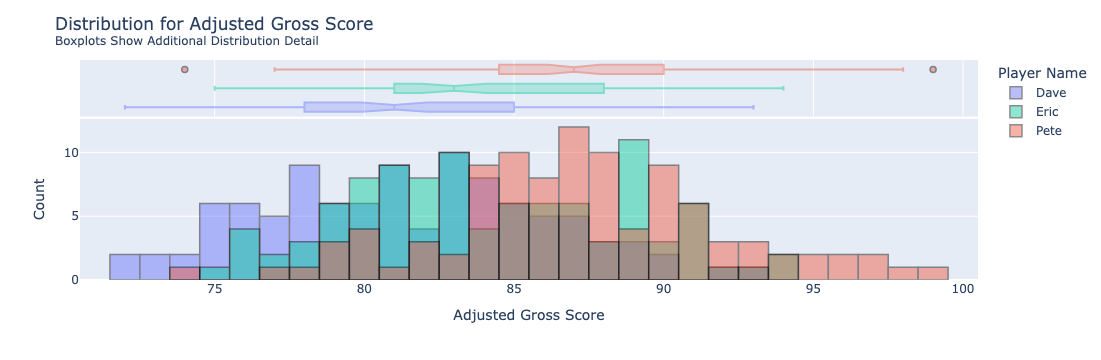

In [15]:
# Plot distributions using histogram with boxplot in the margin
histplot(df, "adj_gross_score")

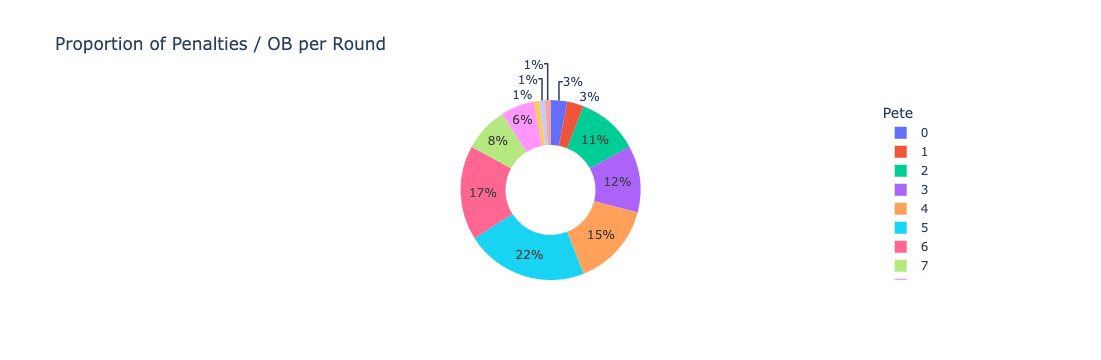

In [16]:
# Example pie chart
pie_chart(df, "penalty/ob", "Pete")

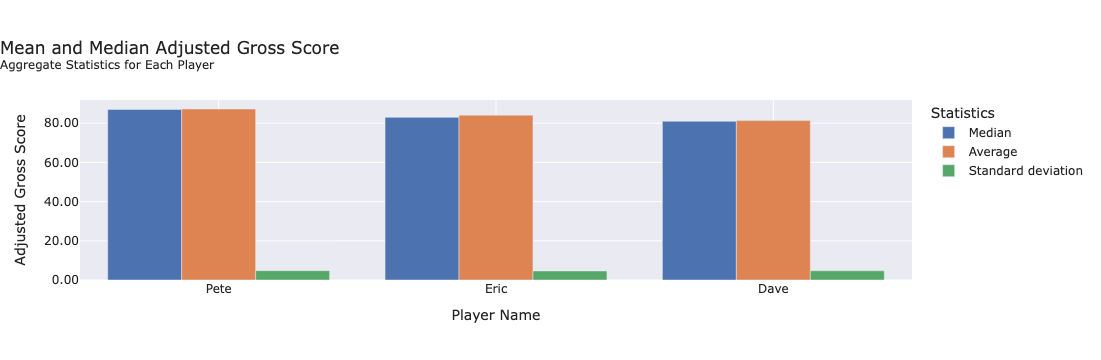

In [17]:
# Aggregate statistics for adjusted gross score
mean_med_stats(df, "adj_gross_score")

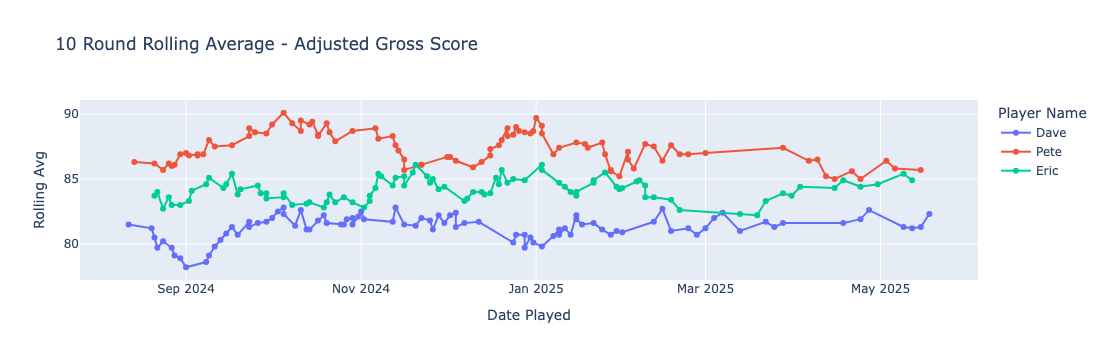

In [18]:
# Plot rolling averages based on specified window
rolling_avg(df, "adj_gross_score", 10)

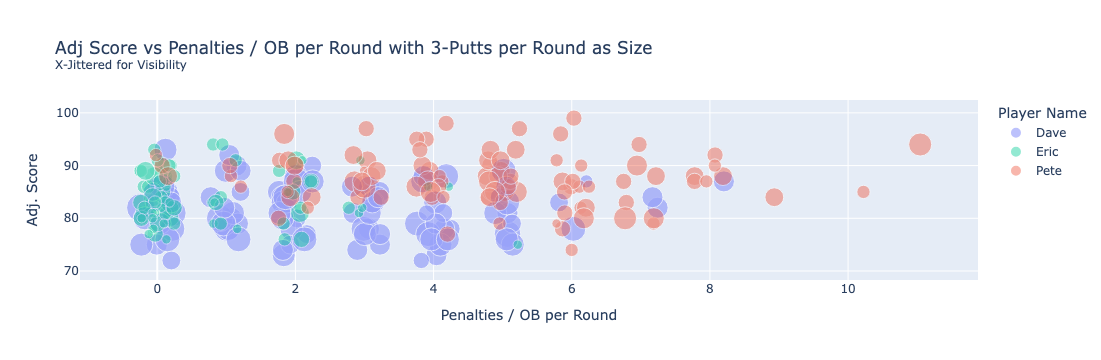

In [19]:
# Scatter plot of adjusted gross score vs penalty strokes with 3-putts as a size variable
scatter(df,"penalty/ob", size="3_putts")

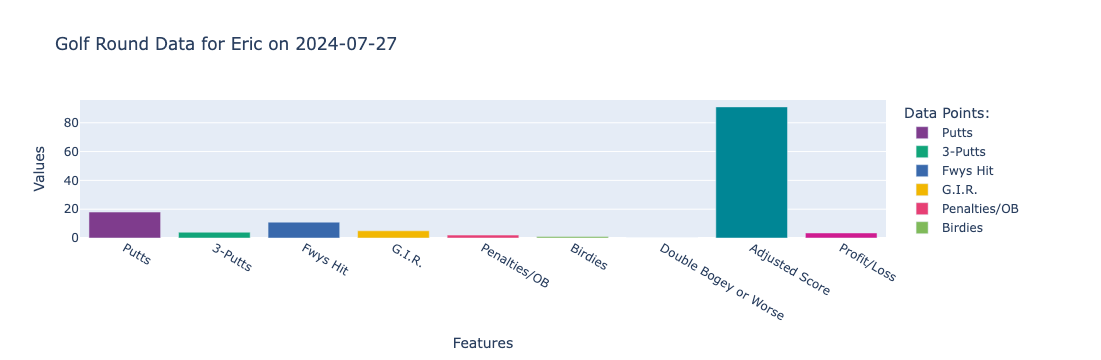

In [22]:
find_round(data=df, date=pd.to_datetime("2024-07-27"), name="Eric")

In [50]:
def total_profit(data:pd.DataFrame, color_map:dict={"Dave":'#636EFA', "Pete":'#EF553B', "Eric":'#00CC96'}):
    """
    Display the total +/- for a player's records in the data

    Args:
    ----------------
    data:pd.DataFrame | source of data
    color_map:dict | color mapping for consistency across plots

    Returns:
    fig.plotly.express.Figure | bar plot showing total profit/loss
    """
    
    fig = px.bar(data_frame = data.groupby("name")["profit/loss"].sum().reset_index(), x="name", y="profit/loss", color="name", color_discrete_map=color_map,
                 title = "Total Profit/Loss for Each Player", hover_name="name", labels={"profit/loss":"Profit/Loss", "name":"Player Name"},
                 hover_data={"name":False})

    return fig

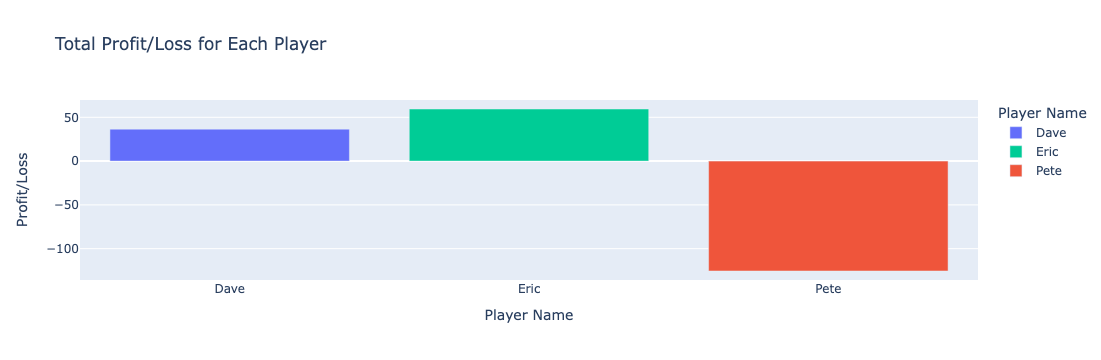

In [52]:
total_profit(df)

<hr style= "border: 3px solid blue">

# File Serialization

In [23]:
# Save synthetic data
df.to_csv("synthetic_data.csv", index=False)

In [24]:
# Verify save quality 
pd.read_csv("synthetic_data.csv").head(9)

name        date  adj_gross_score  course_rating  slope_rating  \
0  Dave  2024-07-22               80           72.0           113   
1  Dave  2024-07-25               80           71.0           112   
2  Eric  2024-07-25               83           73.5           123   
3  Pete  2024-07-25               90           73.0           114   
4  Eric  2024-07-27               91           72.0           128   
5  Dave  2024-07-27               86           71.5           113   
6  Pete  2024-07-28               85           73.5           122   
7  Pete  2024-07-29               84           73.0           127   
8  Dave  2024-07-31               74           72.5           116   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0       8.000000     36        0             6   12           1        2   
1       9.080357     26        5             2    9           1        0   
2       8.727642     18        2            11    4           0        0   
3      16.850877     43        4             3   12           5        0   
4      16.773438     18        4            11    5           2        1   
5      14.500000     18        4             2   12           0        1   
6      10.651639     40        4             2   14           5        0   
7       9.787402     37        4             2   16           2        1   
8       1.461207     18        5             3    8           3        0   

   dbl_bogeys_plus  profit/loss  handicap  jittered_col  
0                1          2.5       NaN      0.852997  
1                0         -1.0       NaN      1.075005  
2                1          1.5       NaN      0.065438  
3                0          0.5       NaN      4.833019  
4                0          3.5       NaN      2.011743  
5                1         -1.5  5.680000     -0.008765  
6                1         -3.0       NaN      5.028699  
7                0         -3.0  7.395906      1.926372  
8                0          3.0  0.402759      2.895177

In [29]:
# Copied a table from a browser
equitable_df = pd.read_clipboard()

In [31]:
# Save to file
equitable_df.to_csv("ESC.csv", index=False)

In [33]:
# Verify
pd.read_csv("ESC.csv").head()

Course Handicap Maximum Number on Any Hole
0       9 or less               Double Bogey
1   10 through 19                          7
2   20 through 29                          8
3   30 through 39                          9
4      40 or more                         10

In [35]:
# Create an additional table for handicap calculation rules

handicap_rds = pd.DataFrame(columns=["Recorded Rounds", "Differentials to Use", "Adjustment"])

handicap_rds.loc[len(handicap_rds)] =["3", "Lowest 1", -2.0]
handicap_rds.loc[len(handicap_rds)] =["4", "Lowest 1", -1.0]
handicap_rds.loc[len(handicap_rds)] =["5", "Lowest 1", 0]
handicap_rds.loc[len(handicap_rds)] =["6", "Average of lowest 2", -1.0]
handicap_rds.loc[len(handicap_rds)] =["7 or 8", "Average of lowest 2", 0]
handicap_rds.loc[len(handicap_rds)] =["9 to 11", "Average of lowest 3", 0]
handicap_rds.loc[len(handicap_rds)] =["12 to 14", "Average of lowest 4", 0]
handicap_rds.loc[len(handicap_rds)] =["15 or 16", "Average of lowest 5", 0]
handicap_rds.loc[len(handicap_rds)] =["17 or 18", "Average of lowest 6", 0]
handicap_rds.loc[len(handicap_rds)] =["19", "Average of lowest 7", 0]
handicap_rds.loc[len(handicap_rds)] =["20", "Average of lowest 8", 0]

In [37]:
# Save to file
handicap_rds.to_csv("handicap_rds.csv", index=False)

In [34]:
# Verify
pd.read_csv("handicap_rds.csv").head()

Recorded Rounds Differentials to Use  Adjustment
0               3             Lowest 1        -2.0
1               4             Lowest 1        -1.0
2               5             Lowest 1         0.0
3               6  Average of lowest 2        -1.0
4          7 or 8  Average of lowest 2         0.0

<hr style="border: 3px solid blue">

# Real Dataframe Creation

In [77]:
# Create real dataframe
df = pd.DataFrame(columns=["name", "date", "adj_gross_score", "course_rating", "slope_rating", "handicap_diff", \
                           "putts", "3_putts", "fairways_hit", "gir", "penalty/ob", "birdies", "dbl_bogeys_plus", "profit/loss"])

df.to_csv("real_data.csv", index=False)

In [78]:
# cell for adding new data 
df = pd.read_csv("real_data.csv")

df.loc[len(df)] = add_round(name="Dave", date="2024-07-22", adj_gross_score=80, course_rating=72, slope_rating=113, putts=36, \
          three_putts=0, fairways=6, gir=12, penalties=1, birdies=2, dbl_bogeys_plus=1, profit_loss=2.5, calc_diff=True)

# Populate Handicap Column
df = get_handicaps(df)

# df.to_csv("real_data.csv", index=False)
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Dave 2024-07-22               80             72           113   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0            8.0     36        0             6   12           1        2   

   dbl_bogeys_plus  profit/loss  handicap  
0                1          2.5       NaN